In [1]:
import sys
sys.path.append("..")  # Add the project root directory to the Python path

In [2]:
from src.download_data import download_kaggle_dataset
# Download the dataset
dataset_name = "mlg-ulb/creditcardfraud"
temp_dir = download_kaggle_dataset(dataset_name, "temp_download")

# Verify the dataset is downloaded
import os
print(f"Files in {temp_dir}: {os.listdir(temp_dir)}")

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Dataset downloaded to directory: temp_download
Files in temp_download: ['creditcard.csv']


In [3]:
import pandas as pd

In [4]:
file_path = os.path.join(temp_dir, "creditcard.csv")  # Adjust the file name as needed
data = pd.read_csv(file_path)

data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 284807
Number of columns: 31


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
target_column = "Class"
data[target_column].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
data[target_column].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

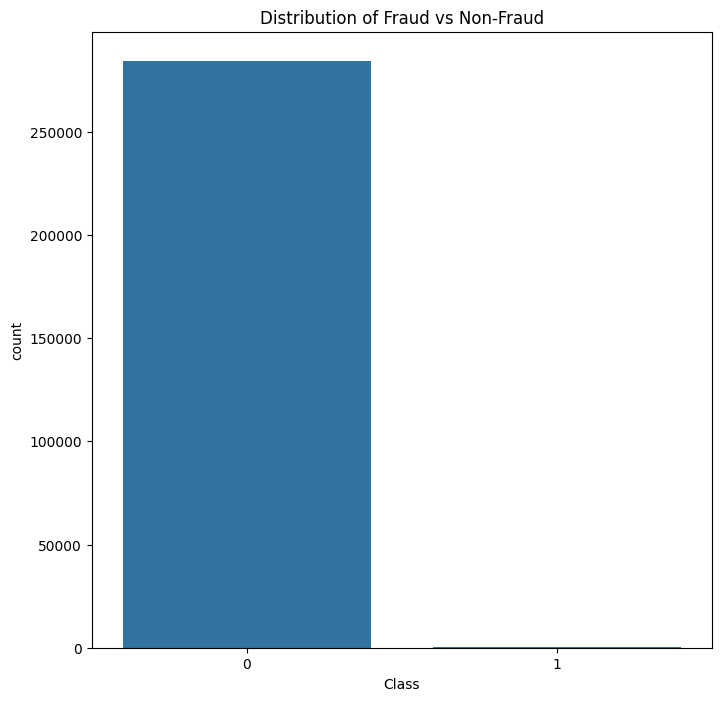

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 8))
sns.countplot(x=target_column, data=data)
plt.title("Distribution of Fraud vs Non-Fraud")
plt.show()

In [12]:
data.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

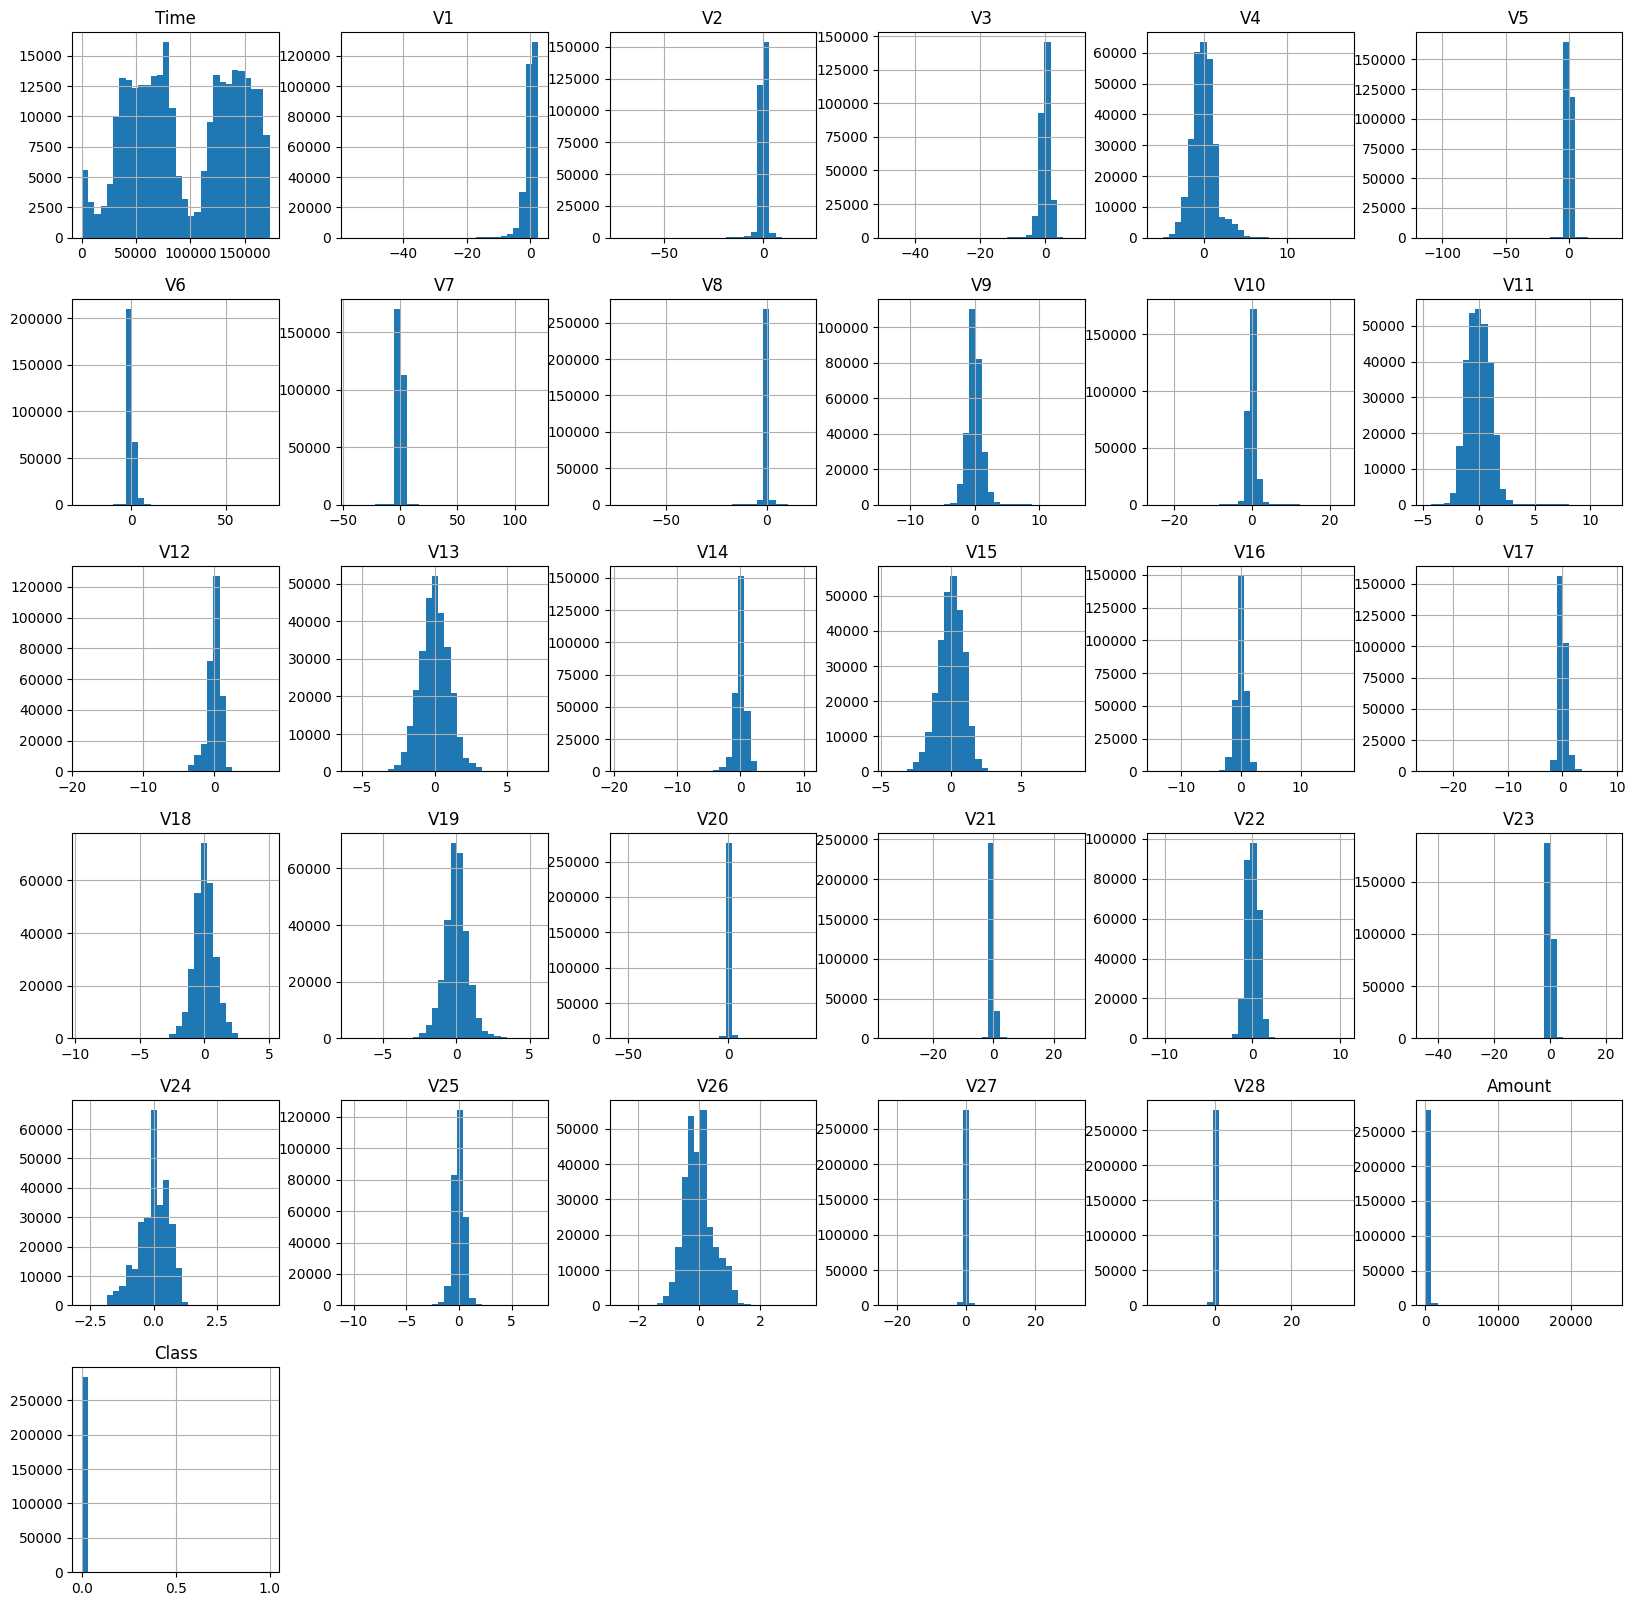

In [13]:
# Plot histograms for all numerical features
data.hist(figsize=(20, 20), bins=30)
plt.show()

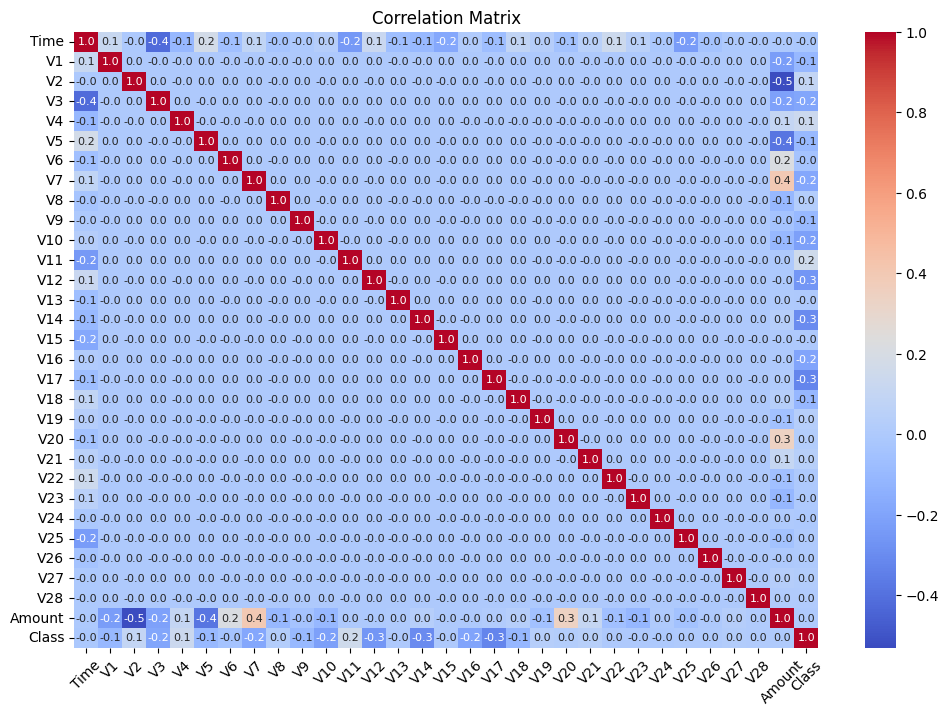

In [14]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    annot_kws={"size": 8}
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Count the number of fraud and non-fraud cases
fraud_cases = data[target_column].value_counts()[1]
non_fraud_cases = data[target_column].value_counts()[0]

print(f"Fraud cases: {fraud_cases}")
print(f"Non-fraud cases: {non_fraud_cases}")
print(f"Imbalance ratio: {non_fraud_cases / fraud_cases:.2f}:1")

Fraud cases: 492
Non-fraud cases: 284315
Imbalance ratio: 577.88:1


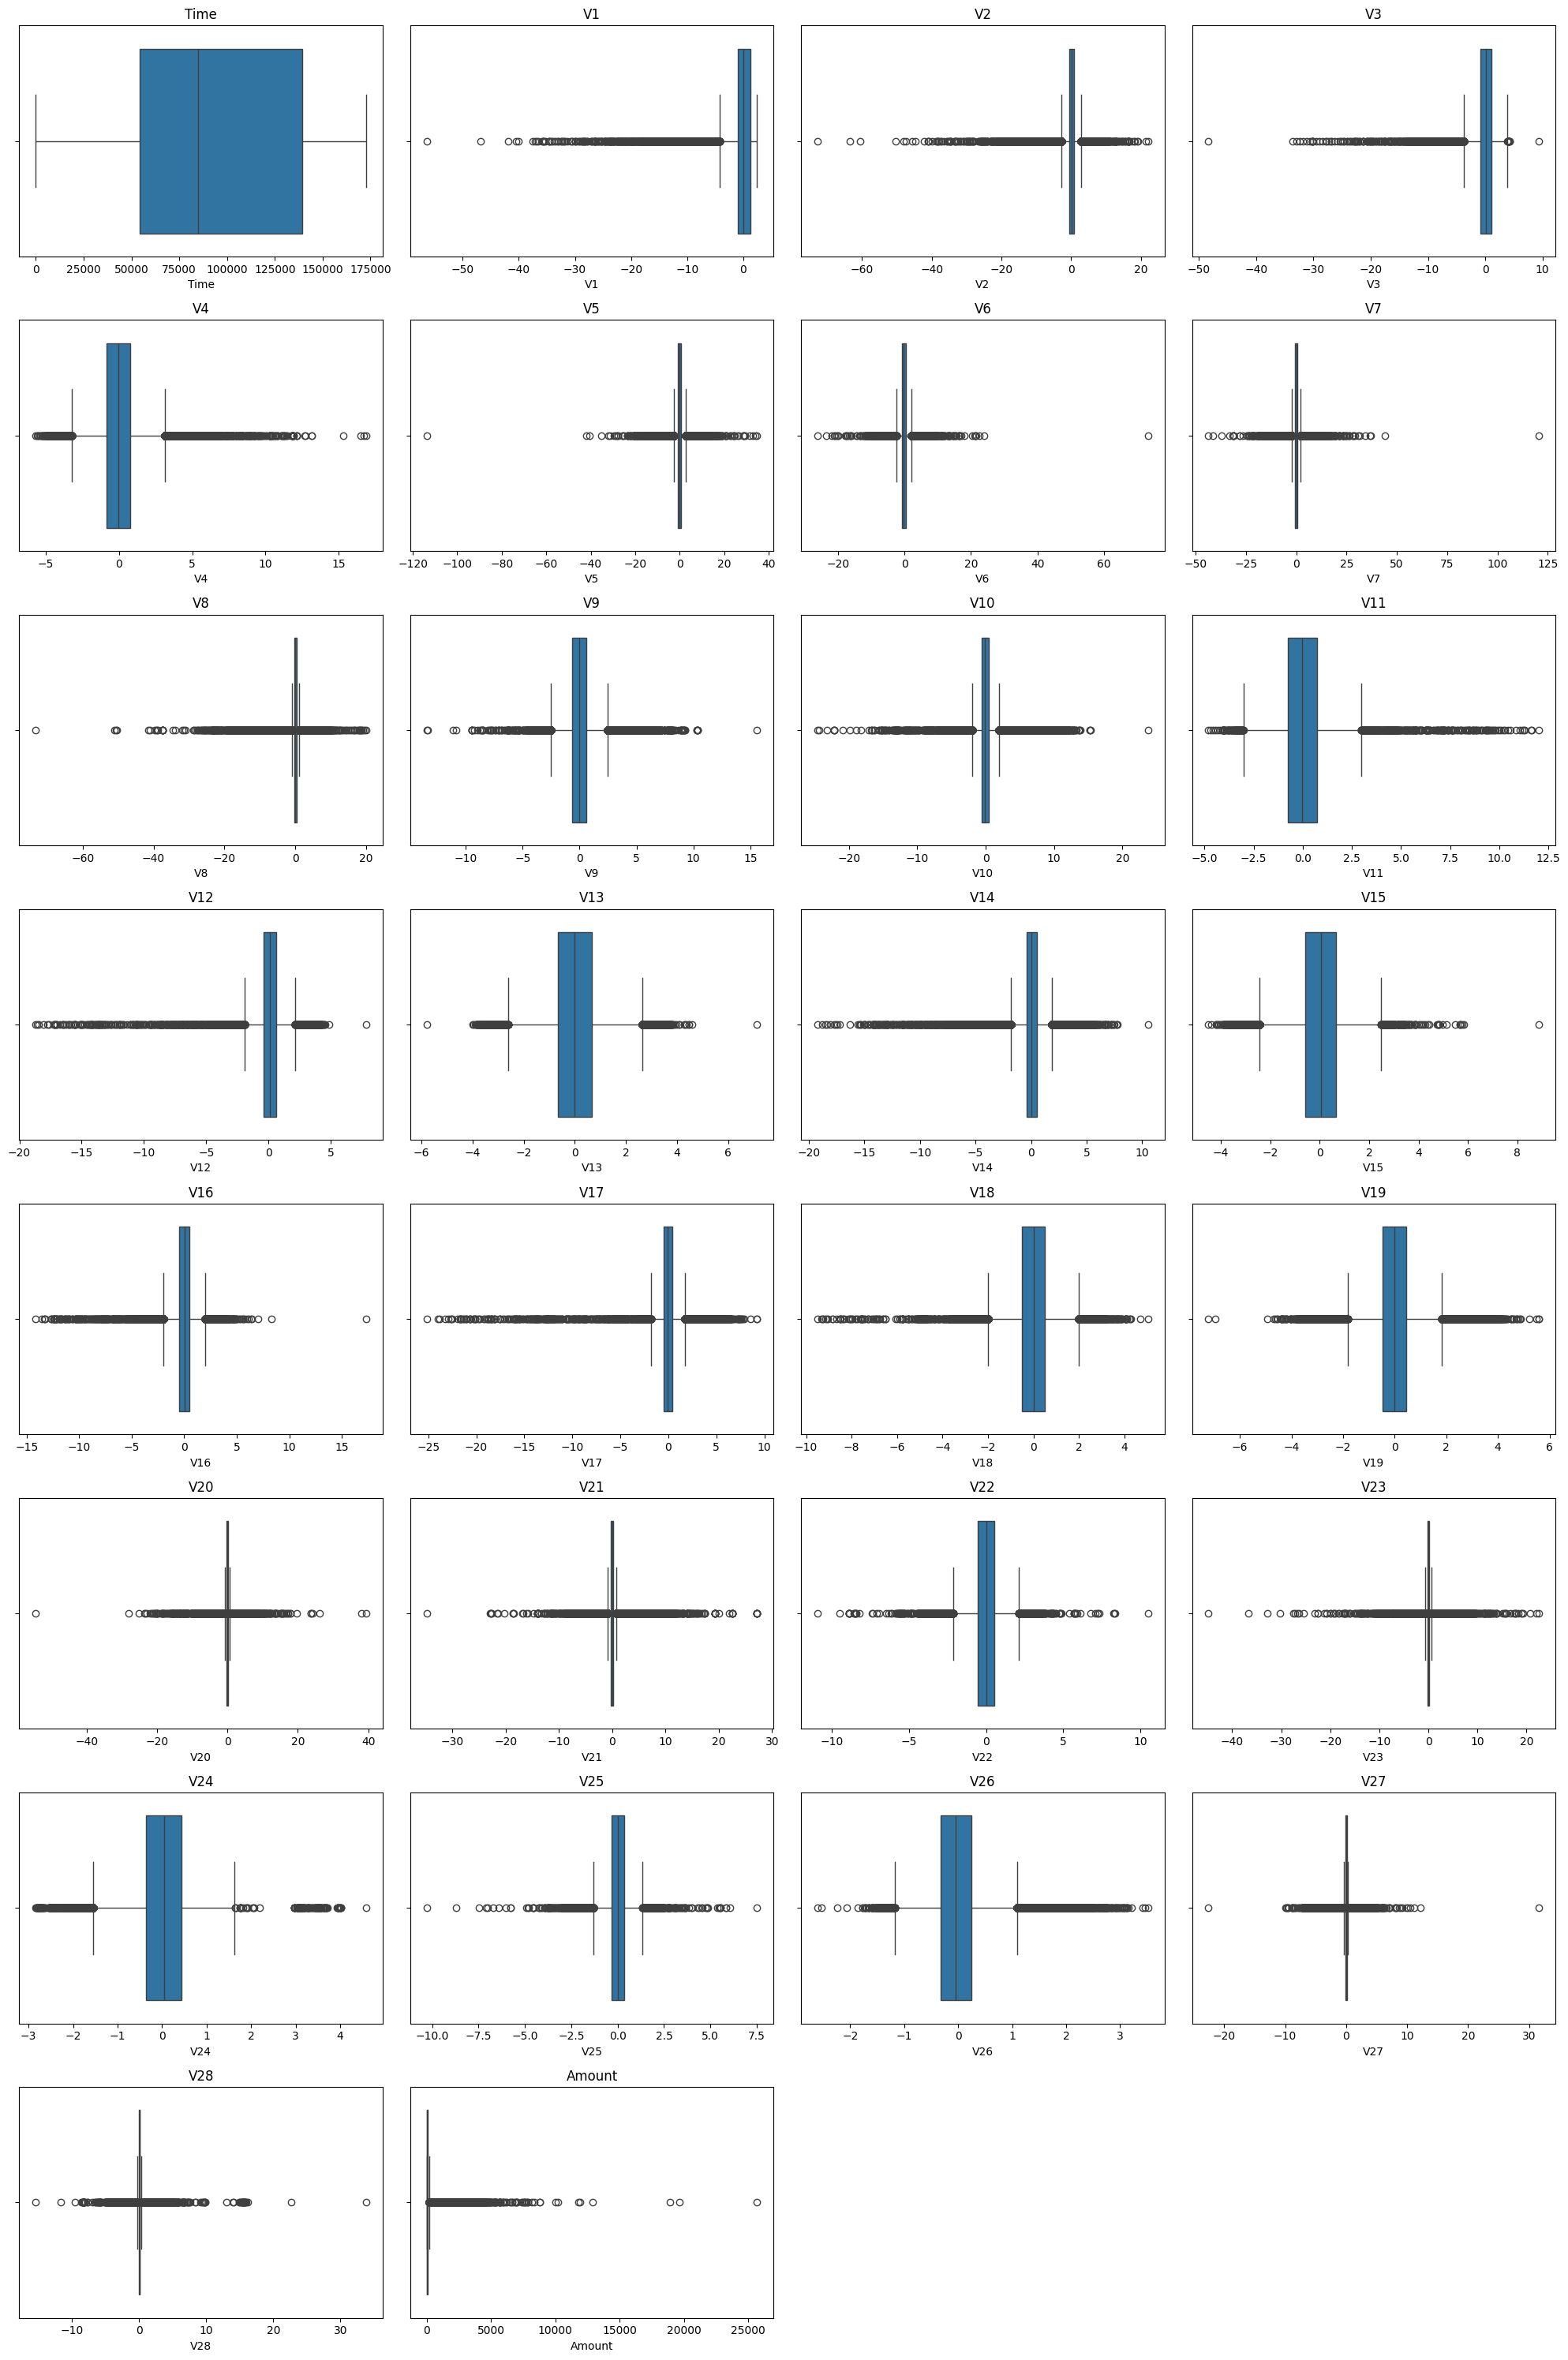

In [16]:
# Select numerical features (excluding the target column)
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns
numerical_features = numerical_features.drop(target_column)

# Plot boxplots for numerical features
plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [17]:
# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers for each numerical feature
outliers = {}
for feature in numerical_features:
    outliers[feature] = detect_outliers_iqr(data[feature])

# Print the number of outliers for each feature
for feature, outlier_values in outliers.items():
    print(f"{feature}: {len(outlier_values)} outliers")

Time: 0 outliers
V1: 7062 outliers
V2: 13526 outliers
V3: 3363 outliers
V4: 11148 outliers
V5: 12295 outliers
V6: 22965 outliers
V7: 8948 outliers
V8: 24134 outliers
V9: 8283 outliers
V10: 9496 outliers
V11: 780 outliers
V12: 15348 outliers
V13: 3368 outliers
V14: 14149 outliers
V15: 2894 outliers
V16: 8184 outliers
V17: 7420 outliers
V18: 7533 outliers
V19: 10205 outliers
V20: 27770 outliers
V21: 14497 outliers
V22: 1317 outliers
V23: 18541 outliers
V24: 4774 outliers
V25: 5367 outliers
V26: 5596 outliers
V27: 39163 outliers
V28: 30342 outliers
Amount: 31904 outliers


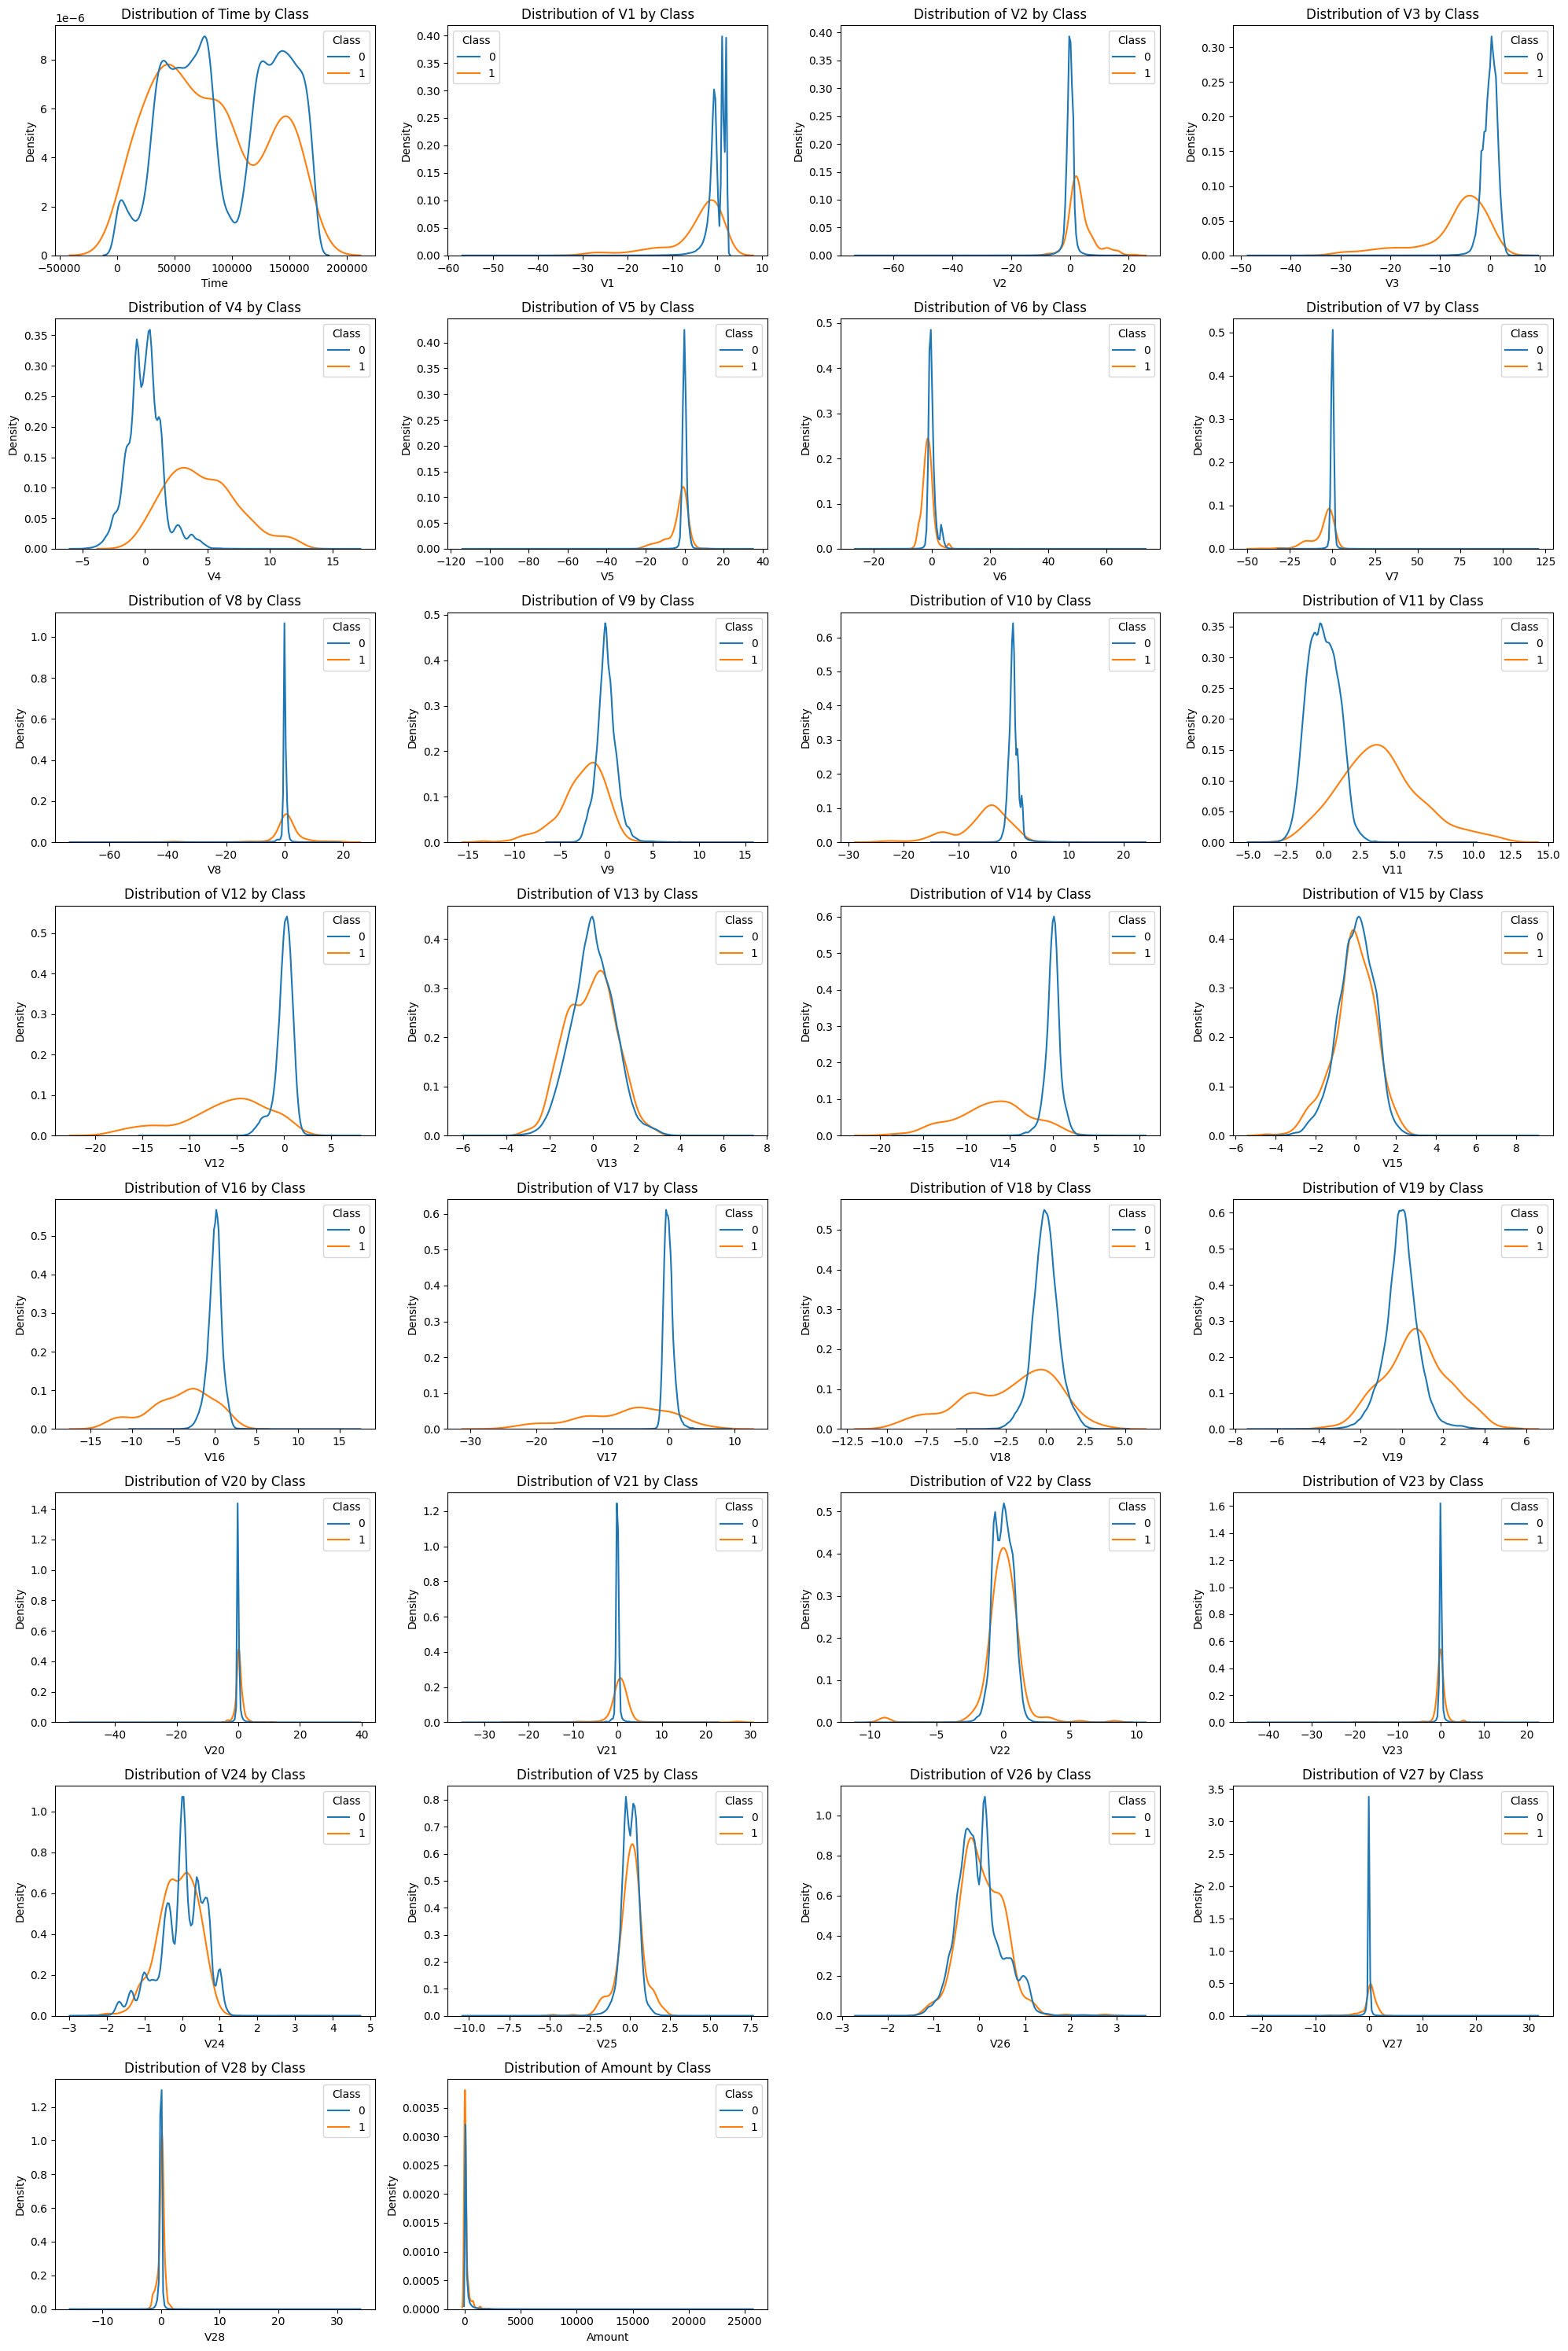

In [18]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(data=data, x=feature, hue=target_column, common_norm=False)
    plt.title(f"Distribution of {feature} by Class")
plt.tight_layout()
plt.show()

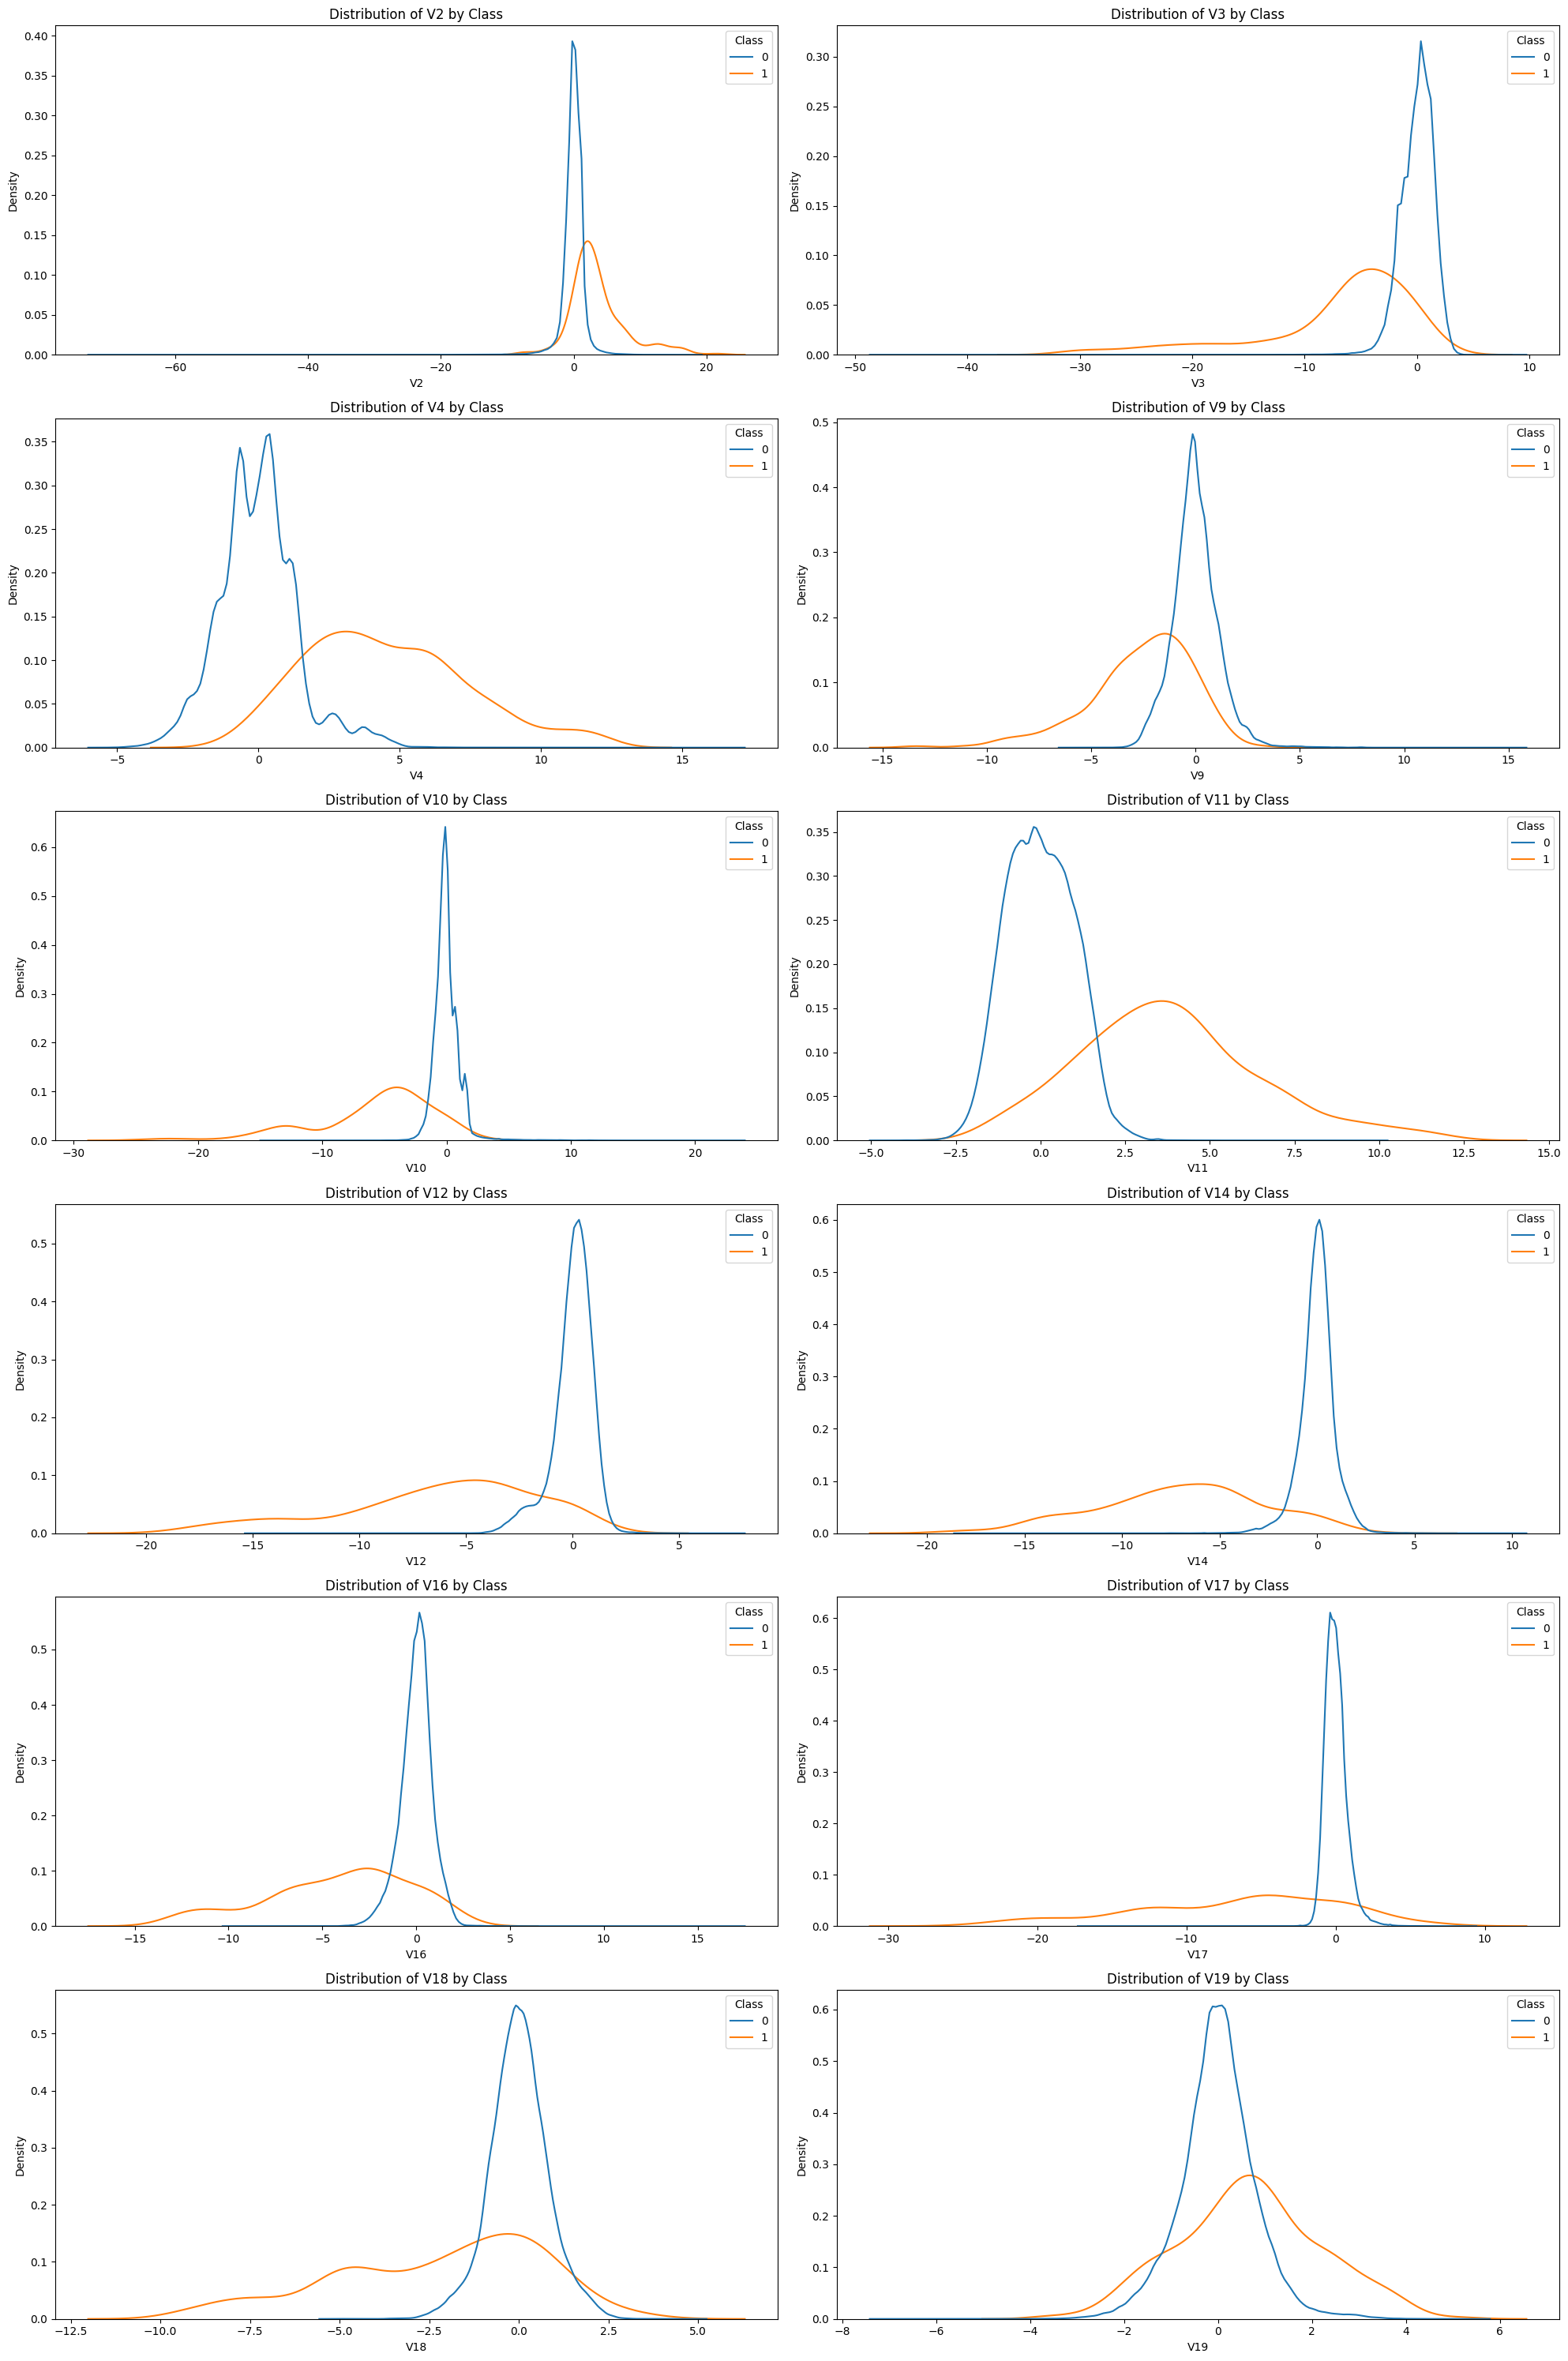

In [19]:
# List of features to investigate
features_to_investigate = ["V2", "V3", "V4", "V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "V19"]

# Plot KDEs for each feature
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features_to_investigate, 1):
    plt.subplot(6, 2, i)
    sns.kdeplot(data=data, x=feature, hue="Class", common_norm=False)
    plt.title(f"Distribution of {feature} by Class")
plt.tight_layout()
plt.show()

In [20]:
# Group by the target column and compute summary statistics
fraud_stats = data.groupby("Class")[features_to_investigate].agg(["mean", "std", "min", "max"])
fraud_stats.T

Class             0          1
V2  mean  -0.006271   3.623778
    std    1.636146   4.291216
    min  -72.715728  -8.402154
    max   18.902453  22.057729
V3  mean   0.012171  -7.033281
    std    1.459429   7.110937
    min  -48.325589 -31.103685
    max    9.382558   2.250210
V4  mean  -0.007860   4.542029
    std    1.399333   2.873318
    min   -5.683171  -1.313275
    max   16.875344  12.114672
V9  mean   0.004467  -2.581123
    std    1.089372   2.500896
    min   -6.290730 -13.434066
    max   15.594995   3.353525
V10 mean   0.009824  -5.676883
    std    1.044204   4.897341
    min  -14.741096 -24.588262
    max   23.745136   4.031435
V11 mean  -0.006576   3.800173
    std    1.003112   2.678605
    min   -4.797473  -1.702228
    max   10.002190  12.018913
V12 mean   0.010832  -6.259393
    std    0.945939   4.654458
    min  -15.144988 -18.683715
    max    7.848392   1.375941
V14 mean   0.012064  -6.971723
    std    0.897007   4.278940
    min  -18.392091 -19.214325
    max   10.526766   3.442422
V16 mean   0.007164  -4.139946
    std    0.844772   3.865035
    min  -10.115560 -14.129855
    max   17.315112   3.139656
V17 mean   0.011535  -6.665836
    std    0.749457   6.970618
    min  -17.098444 -25.162799
    max    9.253526   6.739384
V18 mean   0.003887  -2.246308
    std    0.824919   2.899366
    min   -5.366660  -9.498746
    max    5.041069   3.790316
V19 mean  -0.001178   0.680659
    std    0.811733   1.539853
    min   -7.213527  -3.681904
    max    5.591971   5.228342

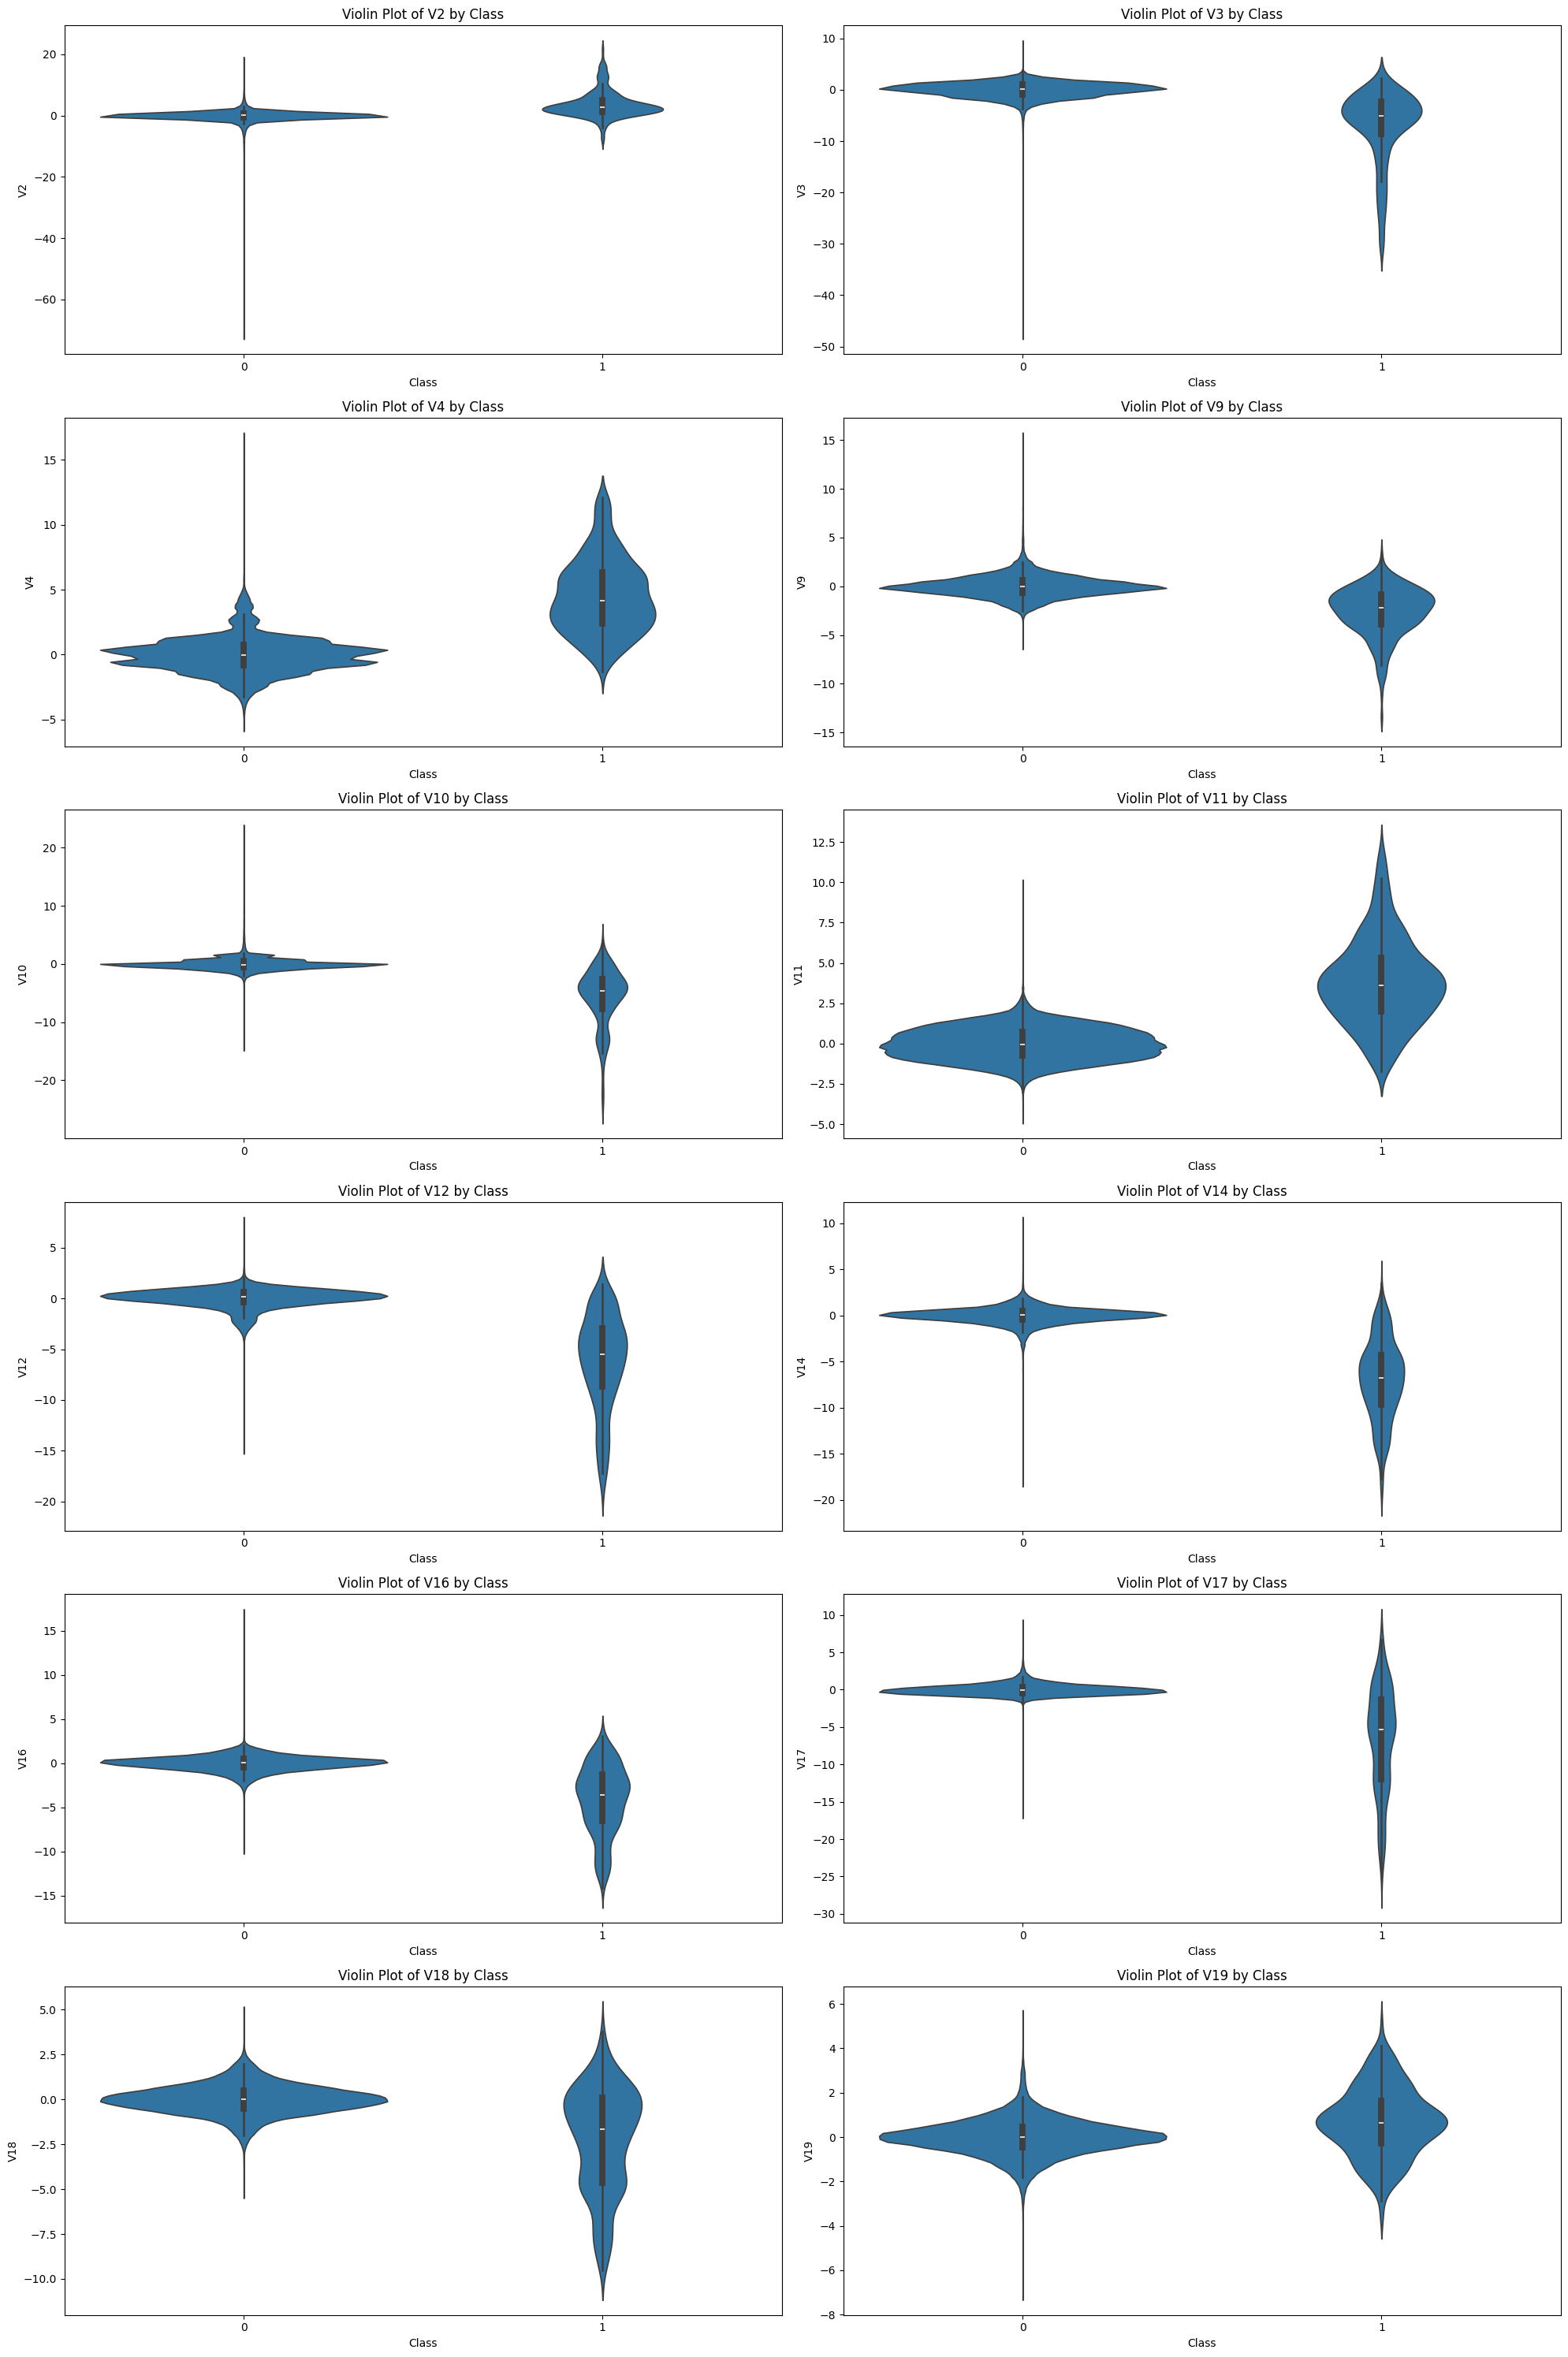

In [21]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features_to_investigate, 1):
    plt.subplot(6, 2, i)
    sns.violinplot(x="Class", y=feature, data=data)
    plt.title(f"Violin Plot of {feature} by Class")
plt.tight_layout()
plt.show()

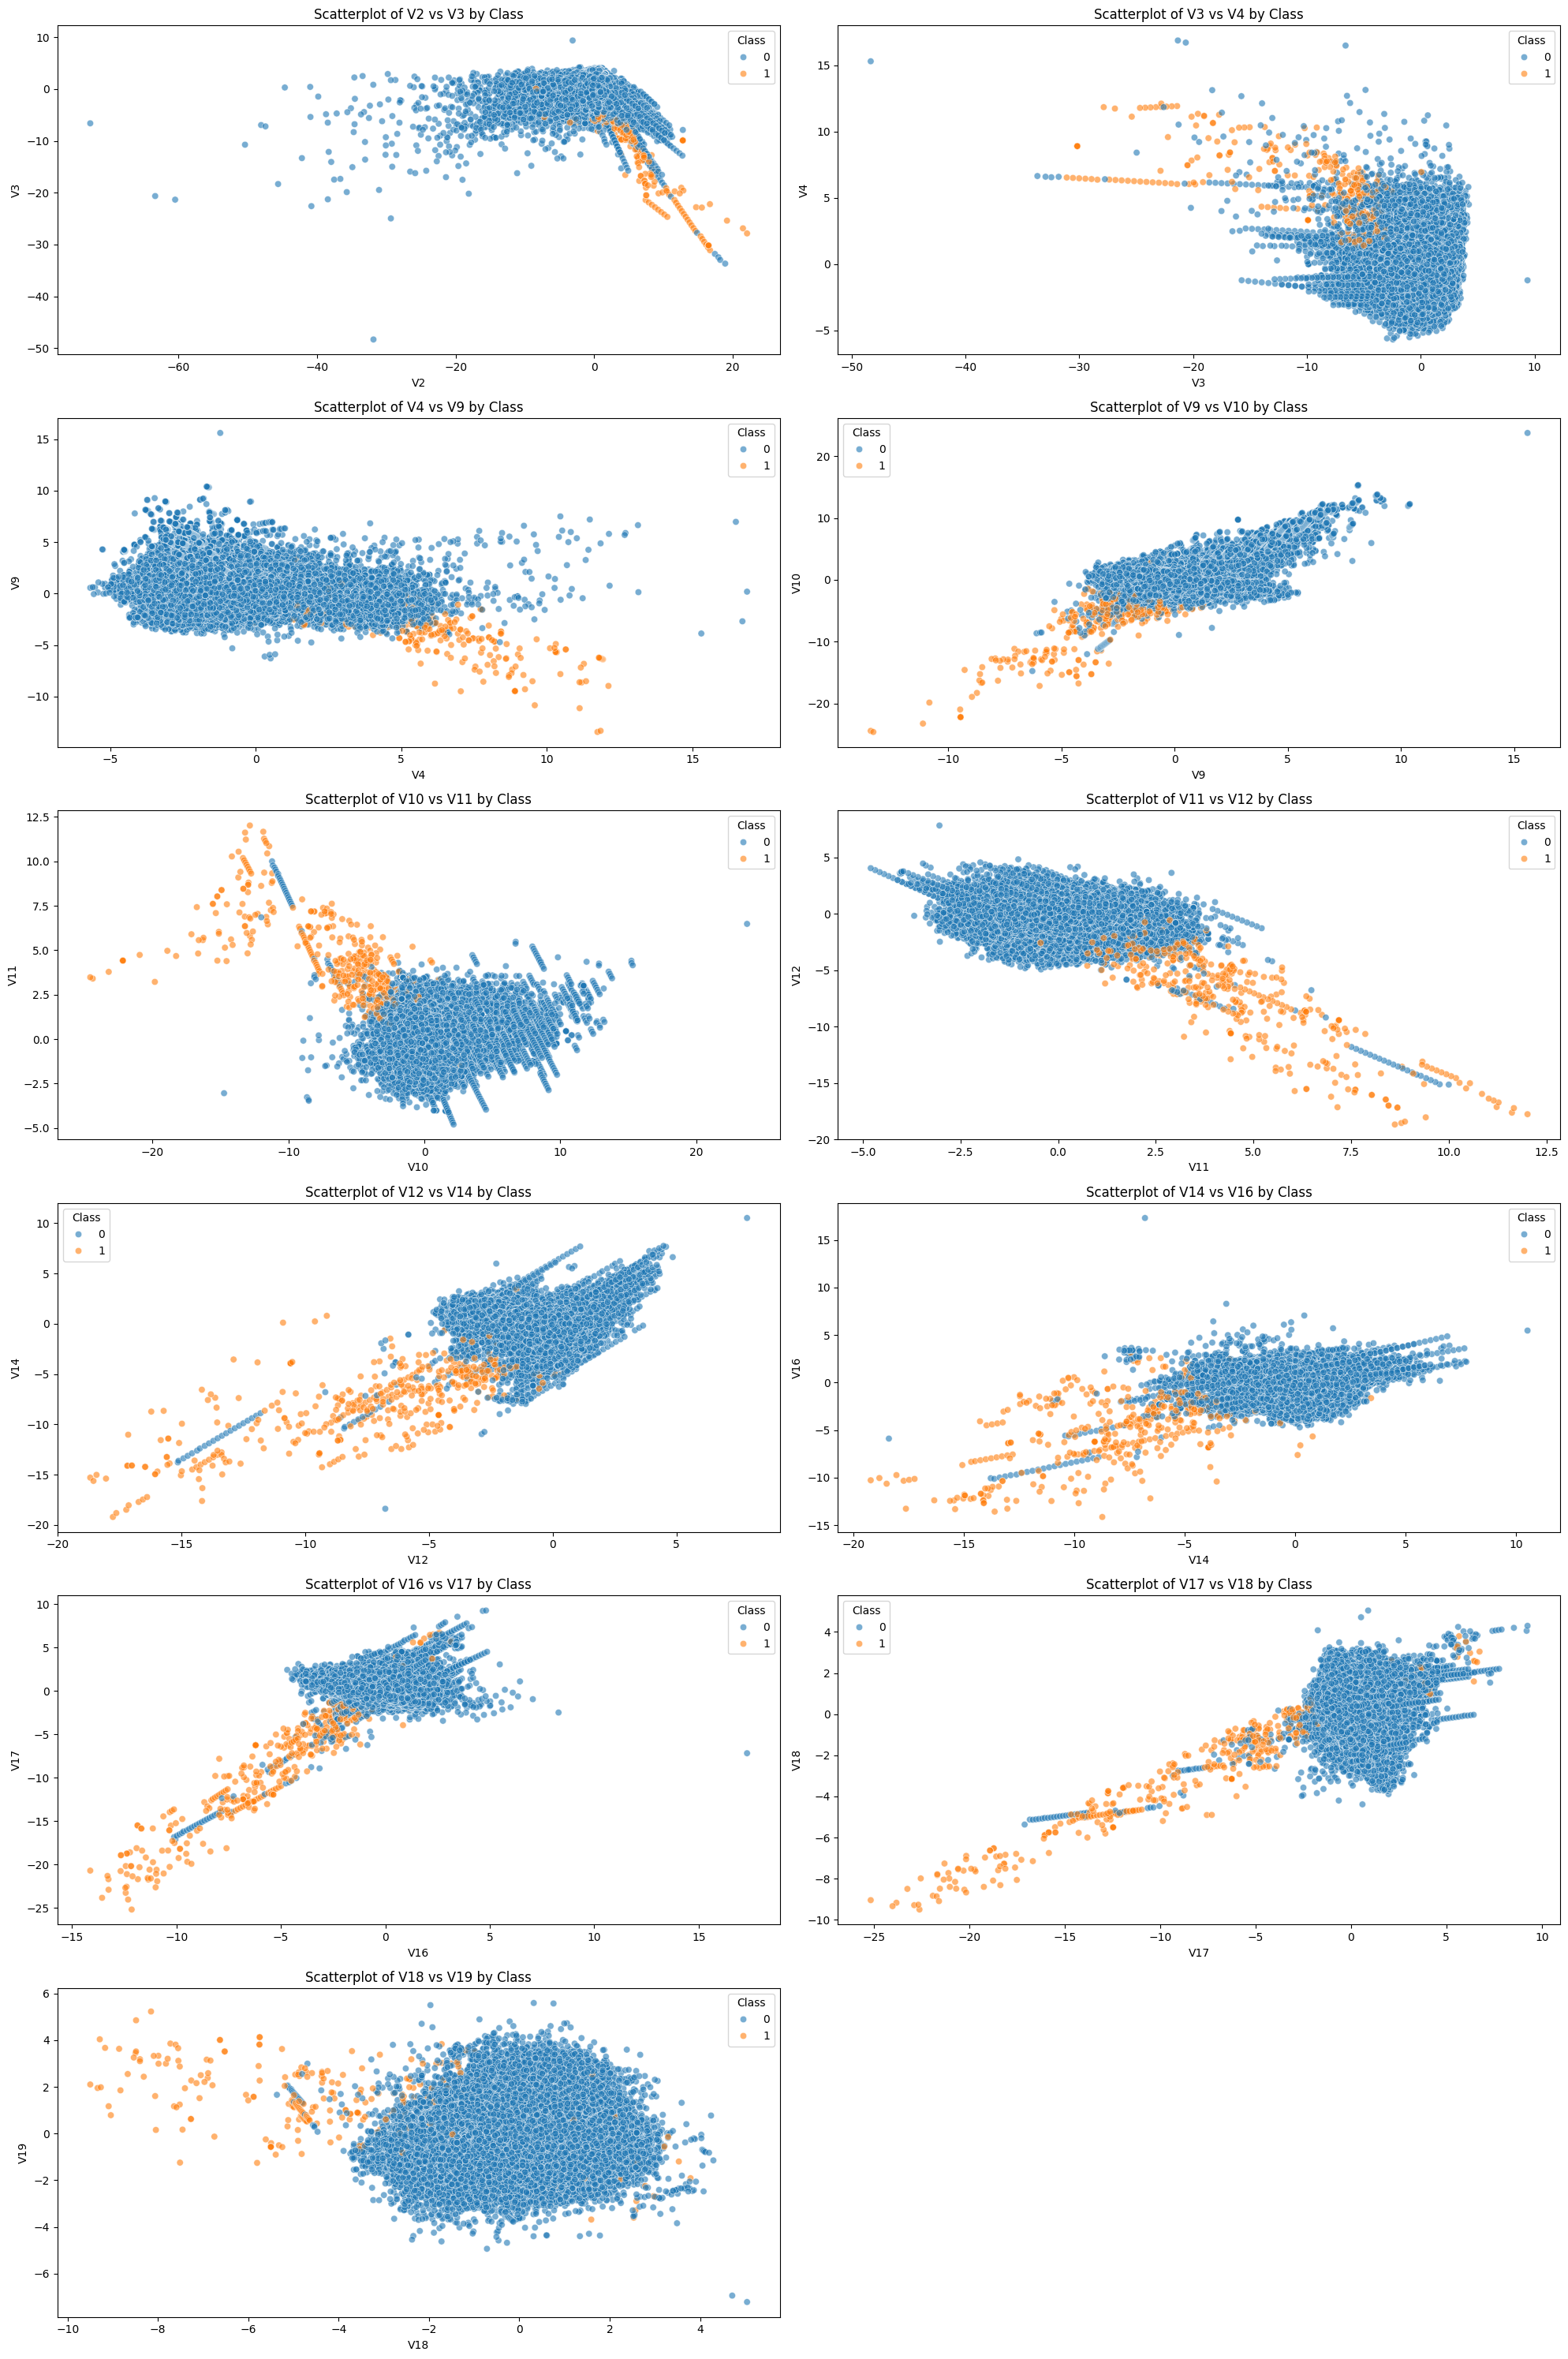

In [22]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features_to_investigate[:-1], 1):
    plt.subplot(6, 2, i)
    sns.scatterplot(x=feature, y=features_to_investigate[i], hue="Class", data=data, alpha=0.6)
    plt.title(f"Scatterplot of {feature} vs {features_to_investigate[i]} by Class")
plt.tight_layout()
plt.show()

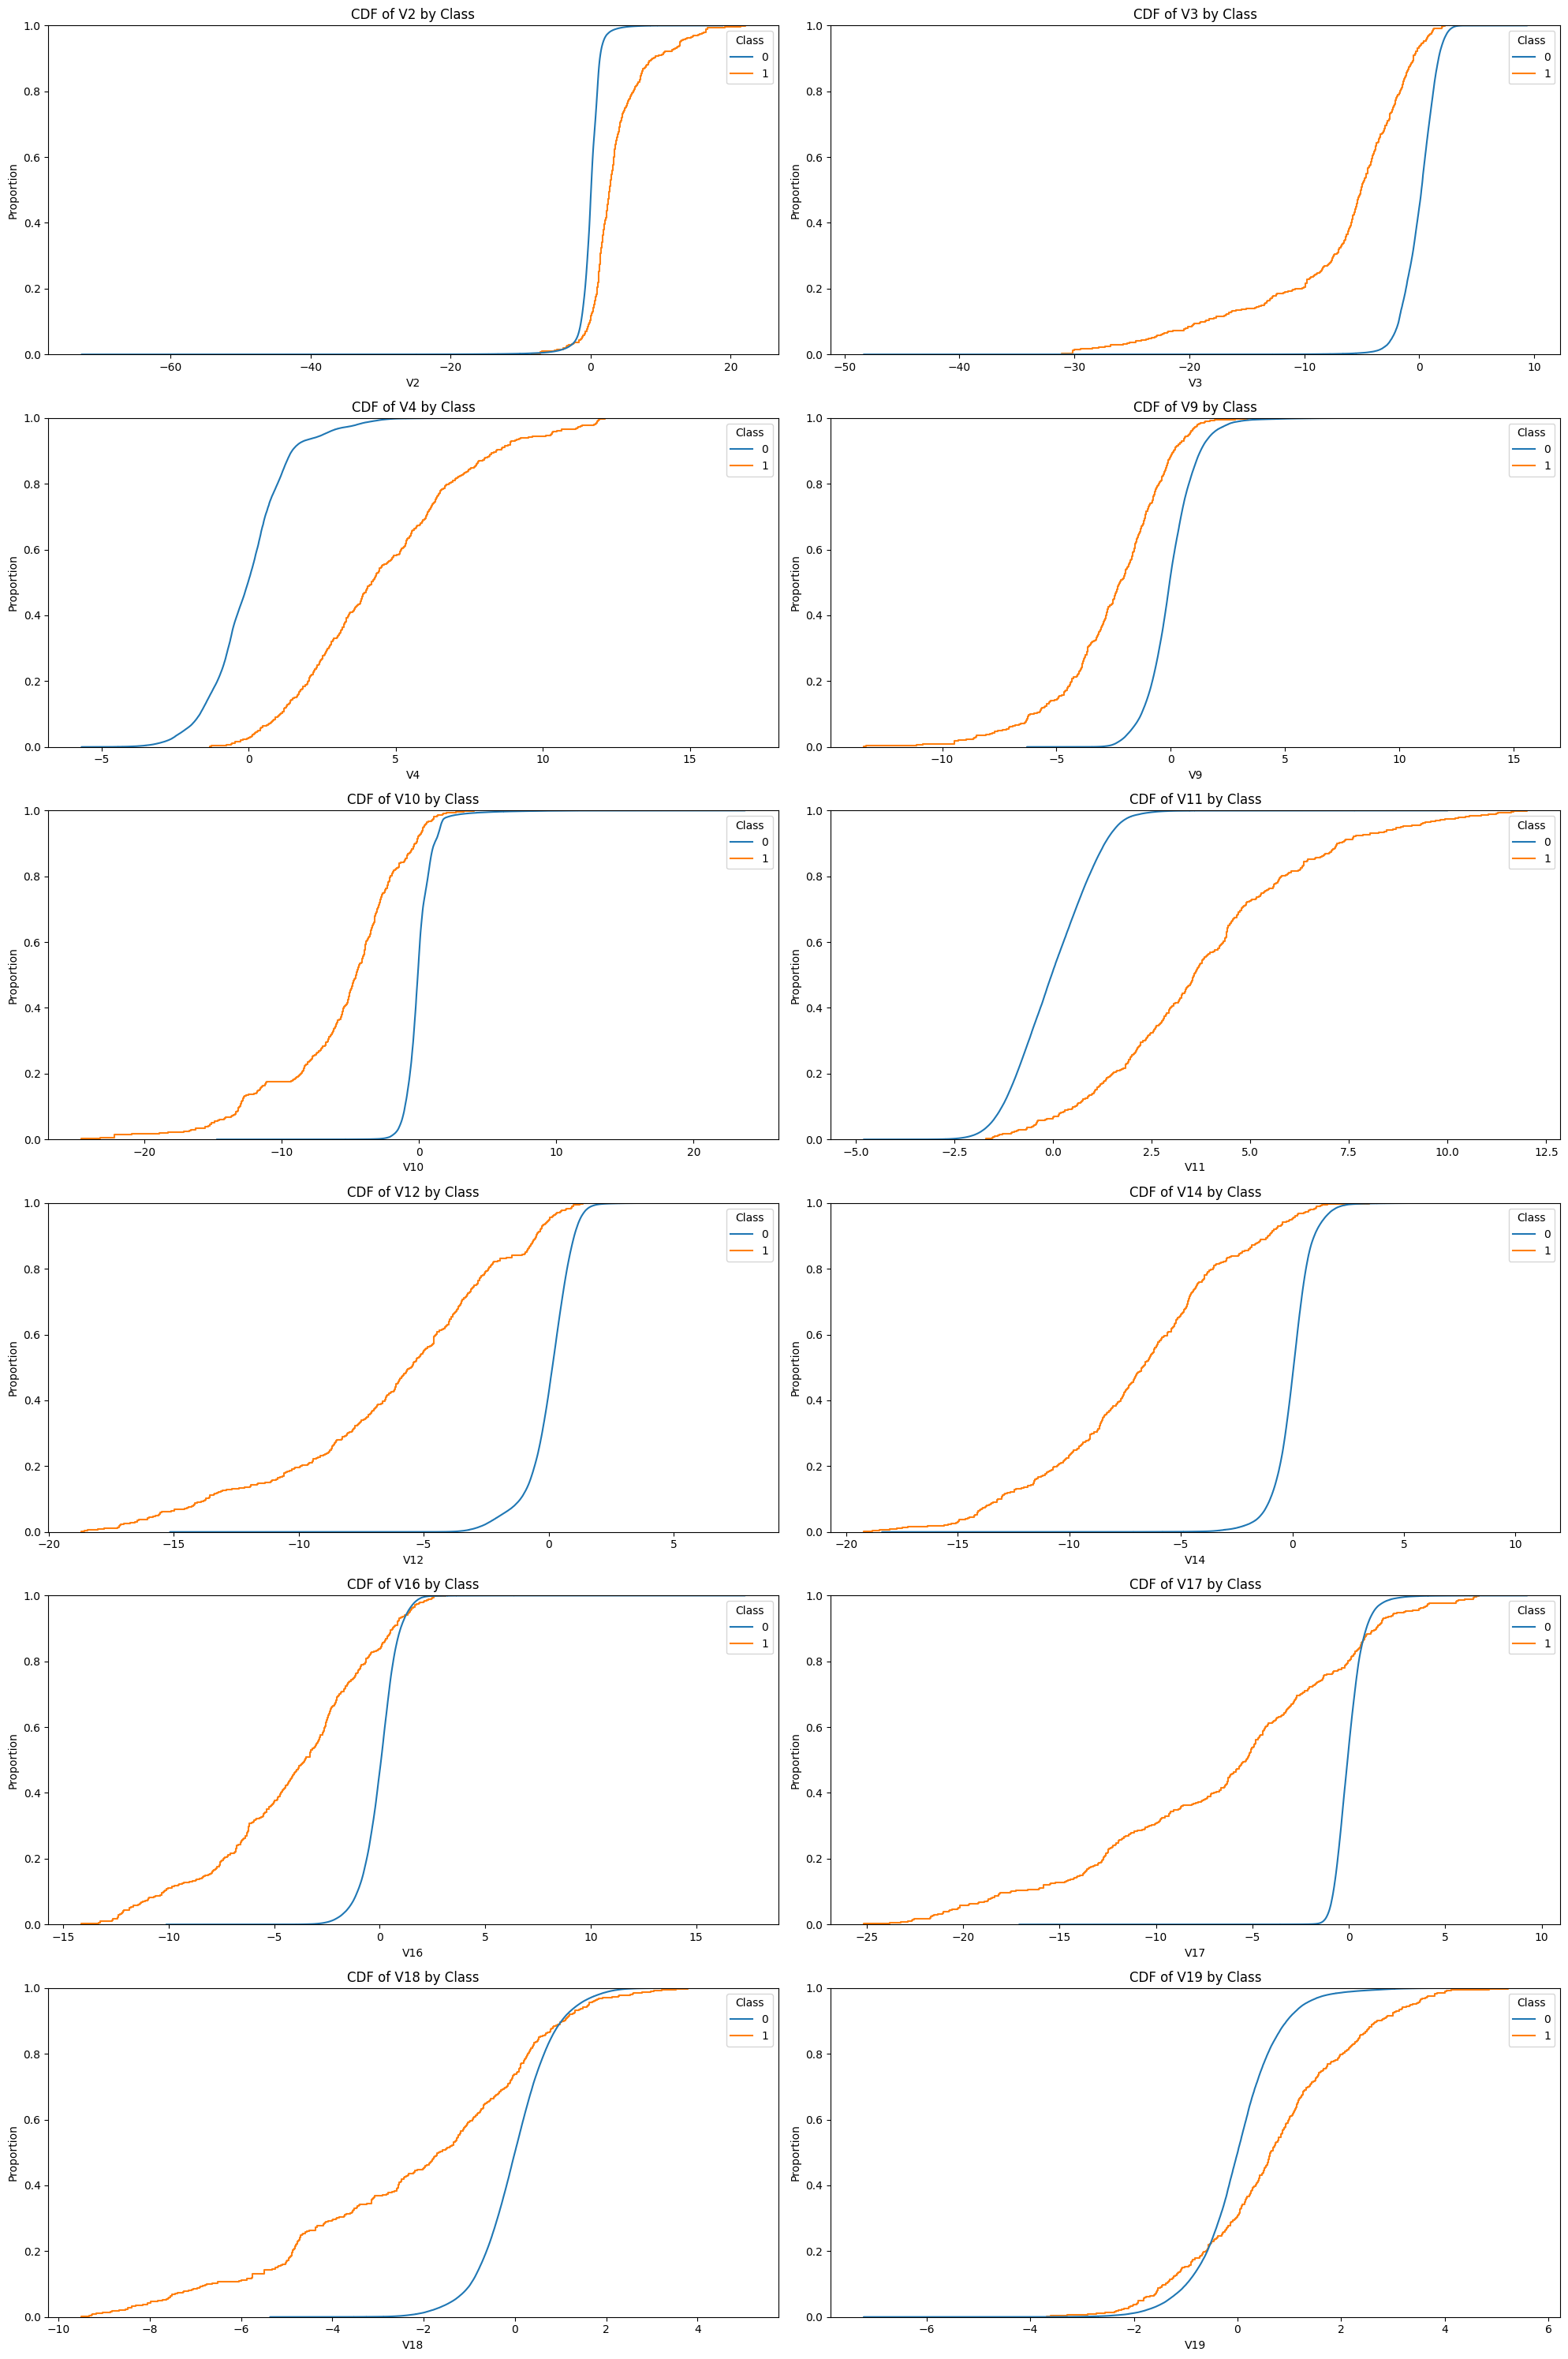

In [23]:
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features_to_investigate, 1):
    plt.subplot(6, 2, i)
    sns.ecdfplot(data=data, x=feature, hue="Class")
    plt.title(f"CDF of {feature} by Class")
plt.tight_layout()
plt.show()